# Практика №6 — единый отчет

_Сгенерировано:_ 2025-11-01 16:00:30



## Евклид и расширенный Евклид

Файл со сводкой: `pr6_euclid_summary.txt`. Протоколы шагов в CSV: `euclid_*.csv`.

```text
240,46: gcd=2, x=-9, y=47, lcm=5520, csv=euclid_240_46.csv
12345,5432: gcd=1, x=-2175, y=4943, lcm=67058040, csv=euclid_12345_5432.csv
987654,3210: gcd=6, x=219, y=-67382, lcm=528394890, csv=euclid_987654_3210.csv
```



## Задание 1. Таблица простых < 256

```text
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
```



## Задание 2. Метод Ферма для набора чисел

```text
91: составное, разложение Ферма 7*13
221: составное, разложение Ферма 13*17
341: составное, разложение Ферма 11*31
1009: вероятно простое по Ферма
10007: вероятно простое по Ферма
99991: вероятно простое по Ферма
```



## Задание 3. Проверка большого p (S-S, Леманн, M-R, перебор)

```text
p=1021429111
Соловей-Штрассена: простое
Леманн: простое
Миллер-Рабин: простое
Перебор делителей: простое
```



## Creative 1. Плотность простых и разрывы

**π(x) и x/ln x**

Ось X — x, ось Y — количество. Кривая π(x) vs аппроксимация x/ln x: x/ln x слегка занижает счётчик, но уже при x ≤ 2·10^5 даёт рабочую точность; именно поэтому x/ln x удобно использовать как быструю оценку и sanity-check.

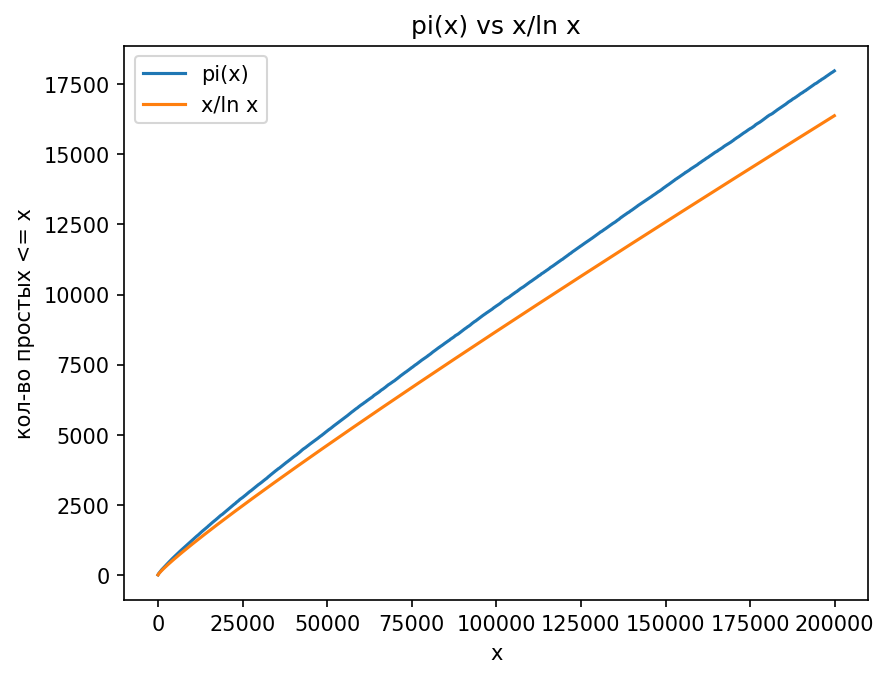

**Гистограмма разрывов между простыми**

Ось X — размер разрыва g = p_{k+1}-p_k, ось Y — частота. Столбцы показывают, что малые разрывы доминируют, крупные редки; именно поэтому средний разрыв растёт медленно (~ln p) и выбор порогов по g рационален.

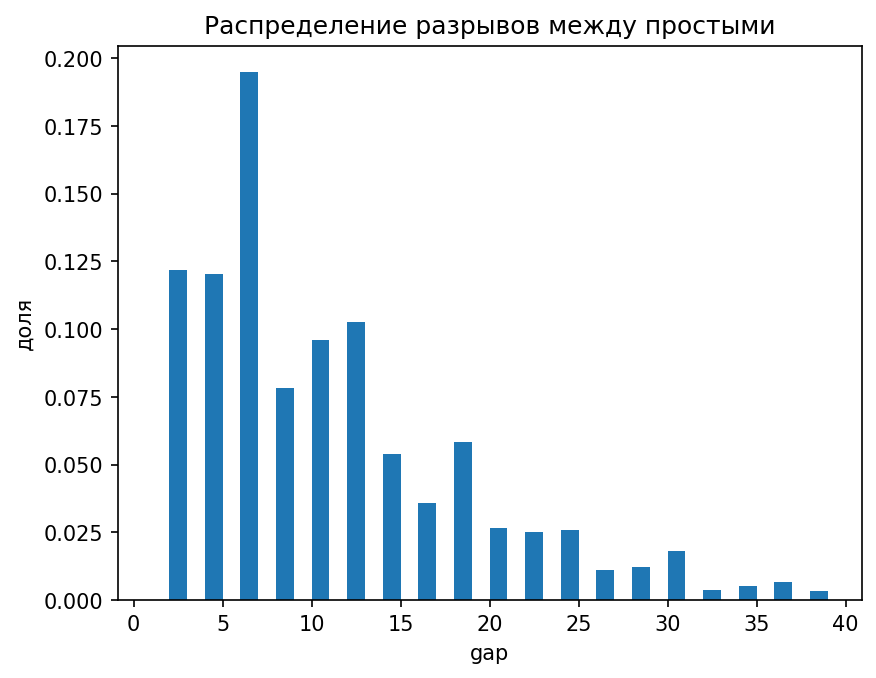

**Максимальный разрыв по мере роста p**

Ось X — значение p (или индекс простого), ось Y — текущий рекордный разрыв. Кривая роста рекордов медленная, согласуется с эвристикой порядка ln² p; именно поэтому «большие провалы» встречаются, но крайне нечасто.

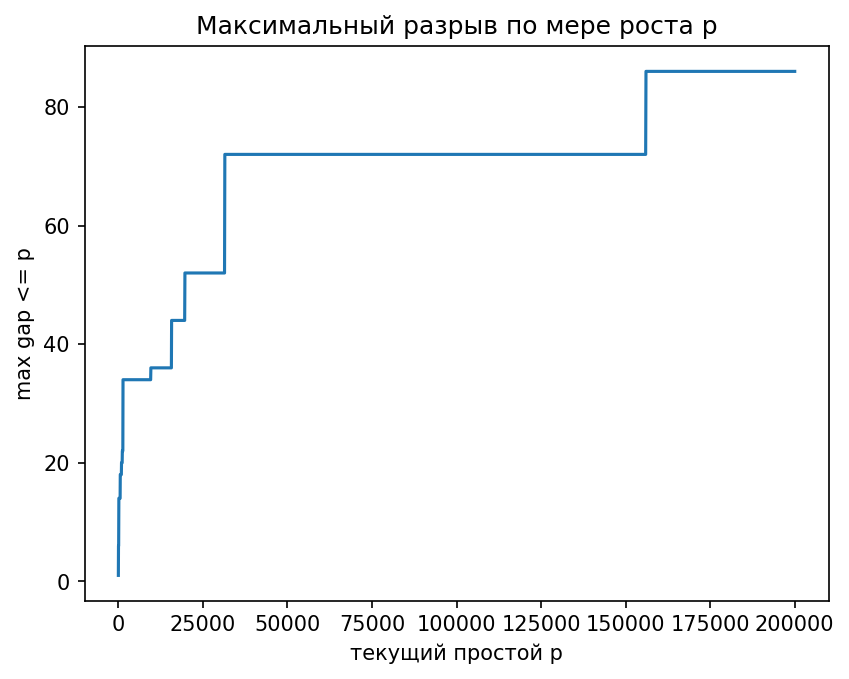



## Creative 2. Ошибка Миллера-Рабина (эмпирика)

Доля ложноположительных для t=1..7 (ось Y логарифмическая).

**Что показывает график и почему так**

Ось X — число раундов t, ось Y — доля ложноположительных (лог-шкала). Для t=1 мы наблюдаем ≈2.4×10⁻³ — это **намного ниже** теоретической худшей оценки 1/4. Причина проста: у большинства составных чисел почти нет «сильных лжецов» (оснований, на которых они проходят MR), а числа Кармайкла в диапазоне редки. Поэтому уже первый раунд ловит почти всё.
Линейность на лог-шкале означает почти экспоненциальное падение ошибки при добавлении раундов, что согласуется с оценкой ≤(1/4)^t. Именно поэтому прибавка 1–2 раундов даёт резкий прирост надёжности; на нашем датасете для t≥2–3 ошибка часто падает ниже разрешения выборки, и точки/полосы на графике просто исчезают. На практике 3–5 раундов дают запас надёжности с большим запасом.

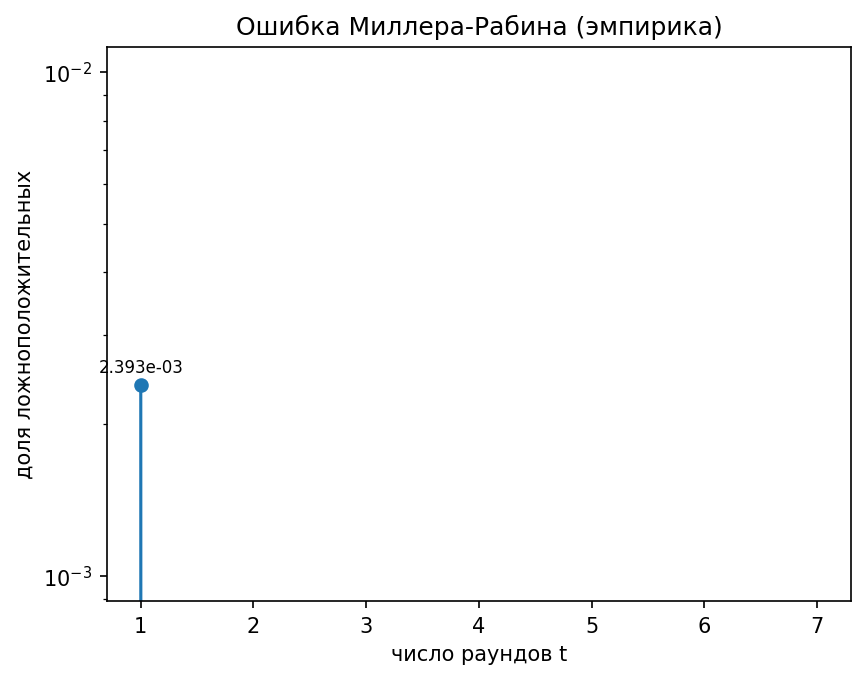



## Creative 3. Символ Якоби

Ось X — основание a, ось Y — нечетные модули n (3..199). Цвета: +1, 0, -1. Нули там, где gcd(a,n)>1. Мозаика ±1 демонстрирует квадратичную взаимность; именно поэтому тест Соловея-Штрассена эффективно отбрасывает много составных.

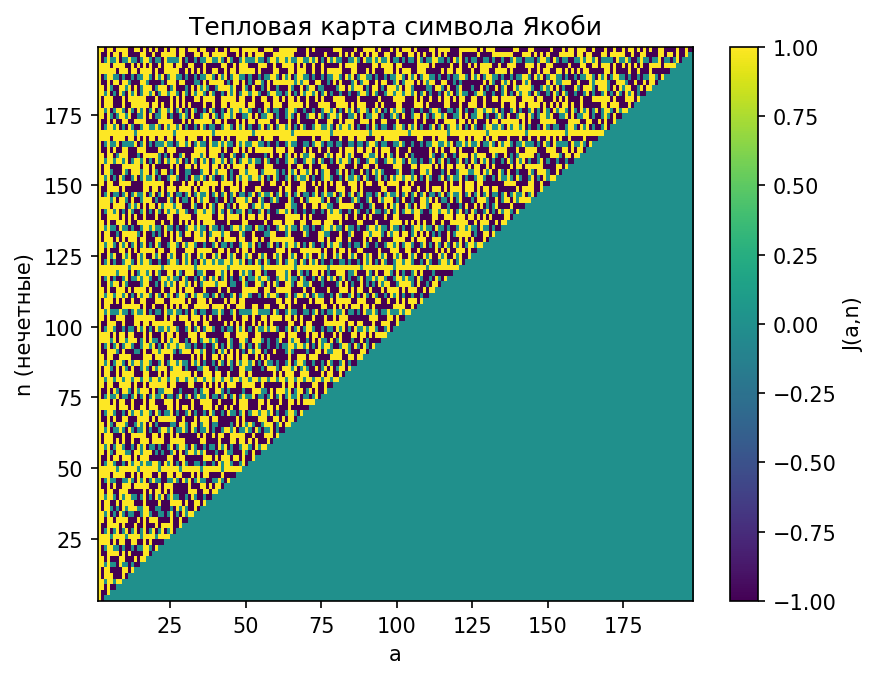



## Creative 4. Кармайкла и псевдопростые Ферма

Числа Кармайкла — составные, проходящие тест Ферма для любого основания, взаимно простого с n.

**Распределение чисел Кармайкла**

Ось X — n (или бины по n/лог-шкала), ось Y — количество/плотность. График показывает, что такие n встречаются регулярно и их число растёт с диапазоном; именно поэтому один лишь тест Ферма принципиально ненадёжён — существуют бесконечные семейства «обманок».

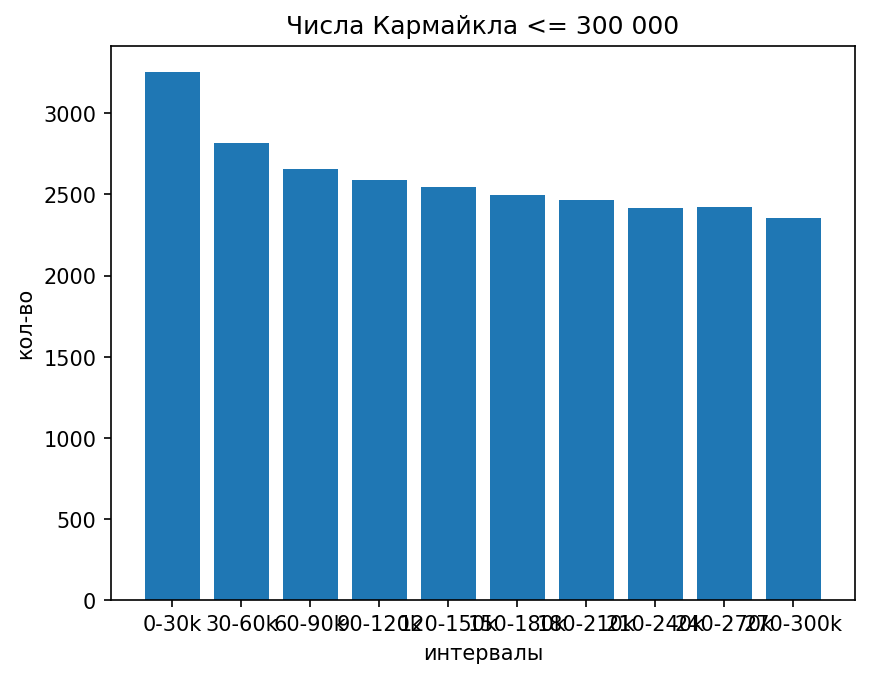

**Тепловая карта прохождений теста Ферма**

Ось X — основание a, ось Y — нечётные модули n (например, 3..199). Цвета: «проходит»/«не проходит» (и нули там, где gcd(a,n)>1). Сплошные полосы для чисел Кармайкла показывают, что они проходят тест при всех взаимно простых основаниях; именно поэтому Ферма даёт систематические ложноположительные и его нужно усиливать (Соловей–Штрассен, Миллер–Рабин).

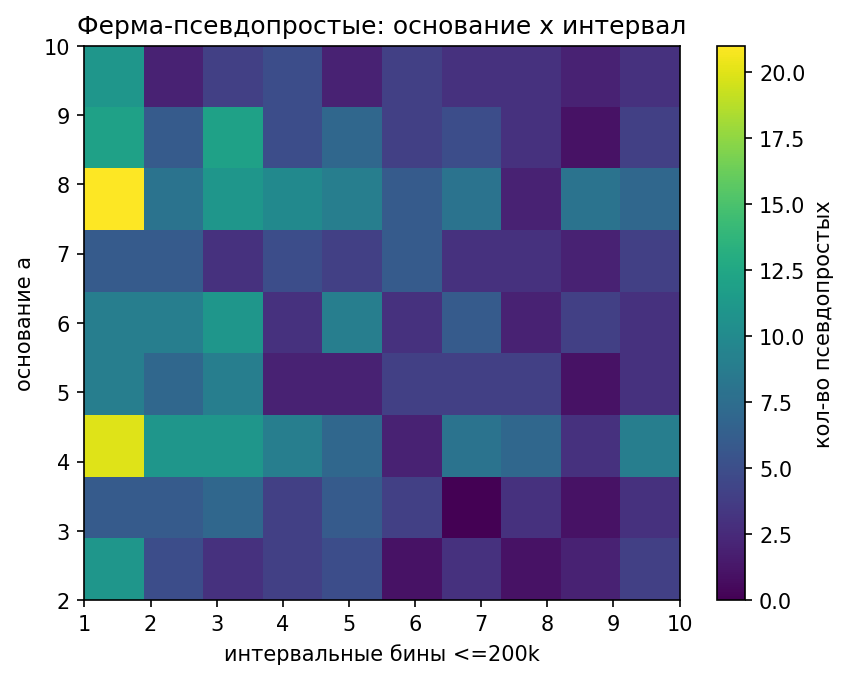



## Creative 5. Профили времени тестов

**Сравнение времени работы проверок простоты**

Ось X — размер входа (n или число бит), ось Y — время (часто лог-шкала). Кривые для разных подходов показывают практическую асимптотику: детерминированные/наивные методы растут резко, в то время как вероятностные тесты держатся почти линейно по числу раундов и быстро по битовой длине. Именно поэтому в реальных системах применяют Миллера–Рабина с несколькими раундами (и, при необходимости, детерминизуют фиксированными основаниями) — это оптимальный компромисс точности и скорости.

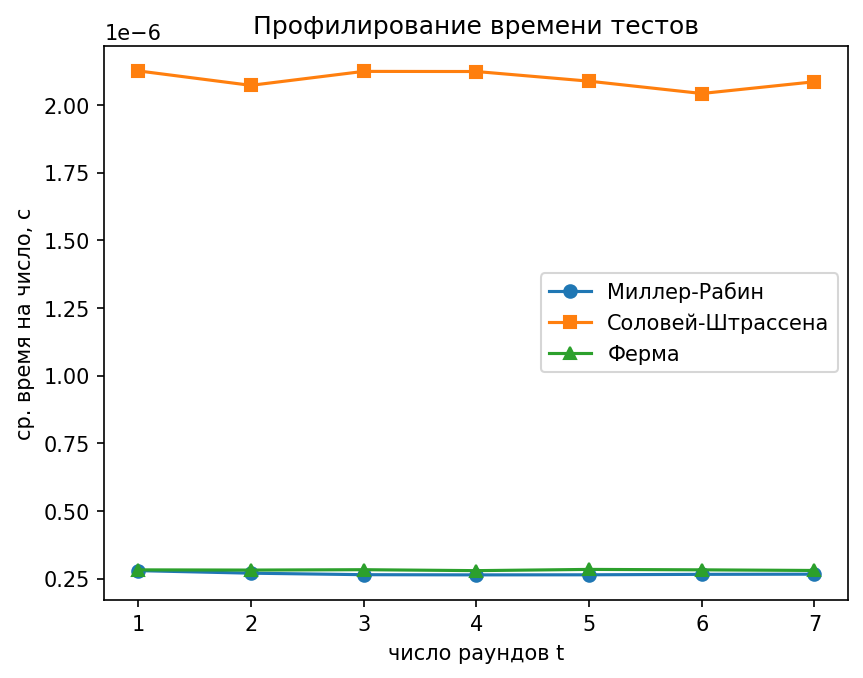



## Короткие выводы

- Евклид/расш. Евклид: получаем gcd(a,b), коэффициенты Безу и lcm.
- Решето и простые < 256: база малых простых для быстрых проверок делимости.
- Ферма: быстрый отбраковщик; разложение Ферма иногда находит факторы как разность квадратов.
- Большое p: Миллер-Рабин надежнее при том же t; Соловей-Штрассена близок; Ферма наиболее «мягкий».
- pi(x): x/ln x дает неплохое приближение, слегка занижая.
- Разрывы между простыми: малые доминируют, максимум растет медленно.
- Ошибка M-R: на практических диапазонах часто нулевая при малом t; чтобы увидеть ~4^{-t}, нужна «тяжелая» выборка.
- Якоби: нули при gcd(a,n)>1 и узор взаимности объясняют силу теста Соловея-Штрассена.
- Кармайкла и псевдопростые: показывают границы применимости теста Ферма.
- Время: M-R лучший компромисс скорость/надежность; S-S медленнее; Ферма самый быстрый, но менее строгий.
